In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import finufft
from PIL import Image
from os import path

In [2]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_family('serif')
font.set_name('Linux Biolinum')
font.set_size(12)

In [40]:
from matplotlib import rcParams
rcParams['font.family'] = 'Linux Libertine'

In [41]:
import matplotlib.font_manager

a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])

for i in a:
    print(i)

Abyssinica SIL
Ani
AnjaliOldLipi
C059
C059
C059
C059
Chandas
Chilanka
D050000L
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif Display
Droid Sans Fallback
Dyuthi
FreeMono
FreeMono
FreeMono
FreeMono
FreeSans
FreeSans
FreeSans
FreeSans
FreeSerif
FreeSerif
FreeSerif
FreeSerif
Gargi
Garuda
Garuda
Garuda
Garuda
Gayathri
Gayathri
Gayathri
Gubbi
Jamrul
KacstArt
KacstBook
KacstDecorative
KacstDigital
KacstFarsi
KacstLetter
KacstNaskh
KacstOffice
KacstOne
KacstOne
KacstPen
KacstPoster
KacstQurn
KacstScreen
KacstTitle
KacstTitleL
Kalapi
Kalimati
Karumbi
Keraleeyam
Khmer OS
Khmer OS System
Kinnari
Kinnari
Kinnari
Kinnari
Kinnari
Kinnari
LKLUG
Laksaman
Laksaman
Laksaman
Laksaman
Liberation Mono
Liberation Mono
Liberation Mono
Liberation Mono
Liberation Mono
Liberat

In [3]:
import seaborn as sns
# sns.set_theme(style="darkgrid")
sns.set_theme(style="white")

In [4]:
def img_err(img_hat, img_ref):
    nom = np.sum(np.square(img_hat - img_ref))
    denom = np.sum(np.square(img_ref))
    return nom / denom

# Error Plot

In [33]:
N = 2048
angles = [0, 5, 10, 13, 15, 20, 25]
err_ASASM = []
err_BEASM = []

for theta in angles:

    if not path.exists(f'results1/RS{N,N}-{theta,theta}.png'):
        break
    im_GT = np.array(Image.open(f'results1/RS{N,N}-{theta,theta}.png'))

    if path.exists(f'results1/BEASM{N,N}-{theta,theta}.png'):
        im_BEASM = np.array(Image.open(f'results1/BEASM{N,N}-{theta,theta}.png'))
        err_BEASM.append(img_err(im_BEASM, im_GT))

    if path.exists(f'results1/ASASM{N,N}-{theta,theta}.png'):
        im_ASASM = np.array(Image.open(f'results1/ASASM{N,N}-{theta,theta}.png'))
        err_ASASM.append(img_err(im_ASASM, im_GT))  

err_BEASM = np.array(err_BEASM)
err_ASASM = np.array(err_ASASM)

/home/hywei/anaconda3/envs/sampling/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 640x480 with 0 Axes>

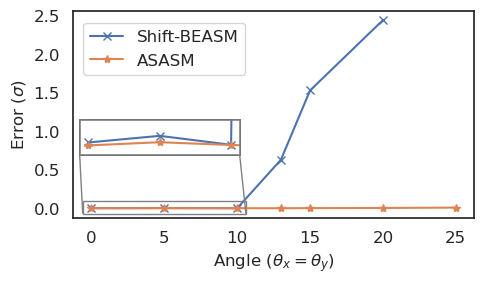

In [34]:
plt.clf()
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
# fig, ax = plt.subplots()
plt.plot(angles[:len(err_BEASM)], err_BEASM, label='Shift-BEASM', marker='x')
plt.plot(angles[:len(err_ASASM)], err_ASASM, label='ASASM', marker='*')
plt.legend(prop=font, loc='lower right', bbox_to_anchor=(0.45, 0.65))
plt.xlabel(fr'Angle ($\theta_x = \theta_y$)', fontproperties=font)
plt.ylabel(fr'Error ($\sigma$)', fontproperties=font)
plt.xticks(fontproperties=font)
plt.yticks(fontproperties=font)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset, inset_axes

axins_dummy = inset_axes(ax, 1.6, 0.35, loc=2, bbox_to_anchor=(0.16, 0.6), bbox_transform=ax.figure.transFigure)
axins_dummy.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False )
axins_dummy.set_xlim(-.6, 10.6)
axins_dummy.set_ylim(-0.07, 0.1)

axins = inset_axes(ax, 1.6, 0.35, loc=2, bbox_to_anchor=(0.16, 0.6), bbox_transform=ax.figure.transFigure)
axins.plot(angles[:4], err_BEASM[:4], label='Shift-BEASM', marker='x')
axins.plot(angles[:4], err_ASASM[:4], label='ASASM', marker='*')
axins.set_xlim(-.6, 10.6)
axins.set_ylim(-0.001, 0.006)
plt.xticks(visible=False)
plt.yticks(visible=False)
for axis in ['top','bottom','left','right']:
    axins.spines[axis].set_linewidth(1.2)
    axins.spines[axis].set_color("gray")

mark_inset(ax, axins_dummy, loc1=3, loc2=4, fc="none", ec="0.5")
fig.tight_layout()

# Expansion $s$ v.s. Error

In [35]:
slist1 = [1, 1.5, 2, 4]
slist2 = [1, 2, 4, 7, 10, 15, 20]
theta = 5
N = 2048
Np = 1024

In [36]:
im_GT = np.array(Image.open(f'results1/RS{N,N}-{theta,theta}.png'))
im_GT_plane = np.array(Image.open(f'results3/RS{Np,Np}-{theta,theta}.png'))
err_ASASM = []
err_ASASM_plane = []
for s in slist1:
    im_ASASM = np.array(Image.open(f'results3/ASASM{N,N}-{theta,theta}-{s}.png'))
    err_ASASM.append(img_err(im_ASASM, im_GT))  
for s in slist2:
    im_ASASM_plane = np.array(Image.open(f'results3/ASASM-plane{Np,Np}-{theta,theta}-{s}.png'))
    err_ASASM_plane.append(img_err(im_ASASM_plane, im_GT_plane))
err_ASASM = np.array(err_ASASM)
err_ASASM_plane = np.array(err_ASASM_plane)

<Figure size 640x480 with 0 Axes>

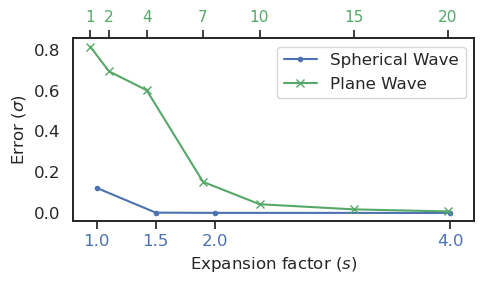

In [38]:
plt.clf()
fig, ax1 = plt.subplots(1, 1, figsize=(5, 3))
plt.xticks(fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel(fr'Expansion factor ($s$)', fontproperties=font)
plt.ylabel(fr'Error ($\sigma$)', fontproperties=font)

color1 = 'b'
ax1.tick_params(axis='x', labelcolor=color1)
ax1.set_xticks(slist1)
l1 = ax1.plot(slist1, (err_ASASM), marker='.', label='Spherical Wave', color=color1)
ax1.set_xlim(0.8, 4.2)

ax2 = ax1.twiny()
color2 = 'g'
ax2.tick_params(axis='x', labelcolor=color2)
ax2.set_xticks(slist2)
l2 = ax2.plot(slist2, (err_ASASM_plane), marker='x', label='Plane Wave', color=color2)
ax2.set_xlim(0.1, 21.4)

lns = l1 + l2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, prop=font, loc='upper right')

fig.tight_layout()

# Results

In [ ]:
N = 2048

In [ ]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.1, wspace=0.4)

theta1 = 8
theta2 = 13
axes = []

ax = fig.add_subplot(3, 6, 1)
im_BEASM = np.array(Image.open(f'results/BEASM{N,N}-{theta1,theta1}.png'))
ax.imshow(im_BEASM, cmap='gray')
axes.append(ax)

ax = fig.add_subplot(3, 6, 2)
im_ASASM = np.array(Image.open(f'results/ASASM{N,N}-{theta1,theta1}.png'))
ax.imshow(im_ASASM, cmap='gray')
axes.append(ax)

ax = fig.add_subplot(3, 6, 3)
im_GT = np.array(Image.open(f'results/RS{N,N}-{theta1,theta1}.png'))
ax.imshow(im_GT, cmap='gray')
axes.append(ax)

ax = fig.add_subplot(3, 6, 4)
im_BEASM = np.array(Image.open(f'results/BEASM{N,N}-{theta2,theta2}.png'))
ax.imshow(im_BEASM, cmap='gray')
axes.append(ax)

ax = fig.add_subplot(3, 6, 5)
im_ASASM = np.array(Image.open(f'results/ASASM{N,N}-{theta2,theta2}.png'))
ax.imshow(im_ASASM, cmap='gray')
axes.append(ax)

ax = fig.add_subplot(3, 6, 6)
im_GT = np.array(Image.open(f'results/RS{N,N}-{theta2,theta2}.png'))
ax.imshow(im_GT, cmap='gray')
axes.append(ax)

plt.setp(axes, xticks=[], yticks=[])

# FU

In [ ]:
from ASASM import mdft, midft
import torch
from torch.fft import fft2, ifft2, fftshift

In [ ]:
def get_spherical_wave(k, x0, y0, to_xx, to_yy, distance):
    ''' 
    Get the phase shift of the spherical wave from a single point source 
    
    :param x0, y0: spatial coordinate of the source point
    :param to_xx, to_yy: coordinate grid at the destination plane
    :param distance: scalar tensor, travel distance
    :return: the spherical wave at destination
    '''

    radius = np.sqrt(distance**2 + (to_xx - x0)**2 + (to_yy - y0)**2)
    phase = k * radius

    lam = 2 * np.pi / k
    # normalize the total energy of input light to 1
    amplitude = distance / lam / radius
    amplitude /= np.sqrt(np.sum(amplitude**2, axis=(-2,-1), keepdims=True))
    return amplitude * np.exp(1j * phase)

In [ ]:
lam = 500e-9  # wavelength of light in vacuum
k = 2 * np.pi / lam  # wavenumebr
r = 35e-3 / 16 / 2  # radius of aperture
zo = 1.7  # source-aperture distance

# coordinates of aperture
Nx = Ny = 1024
x = np.linspace(-r, r, Nx)
y = np.linspace(-r, r, Ny)
xx, yy = np.meshgrid(x, y, indexing='xy')
pitch = 2 * r / (Nx - 1)

x0 = 0.1
y0 = 0

E0 = torch.tensor(get_spherical_wave(k, 0, 0, xx, yy, zo))
E = torch.tensor(get_spherical_wave(k, x0, y0, xx, yy, zo))
x = torch.tensor(x)
y = torch.tensor(y)

In [ ]:
fftmax = 1 / pitch / 2
dfx = fftmax * 2 / Nx
fx = torch.linspace(-fftmax, fftmax - dfx, Nx, dtype=torch.double).unsqueeze(0)
fy = torch.linspace(-fftmax, fftmax - dfx, Ny, dtype=torch.double).unsqueeze(0)
fxx, fyy = torch.meshgrid(fx[0], fy[0], indexing='xy')

In [ ]:
FU0 = fftshift(fft2(E0))
FU = fftshift(fft2(E))
FU_new = FU0 * torch.exp(1j * x0 * fxx * 2 * torch.pi) * torch.exp(1j * y0 * fyy * 2 * torch.pi)
plt.subplots(1, 3, figsize=(15, 15))
plt.subplot(131)
plt.imshow(abs(FU0), cmap='gray')
plt.subplot(132)
plt.imshow(abs(FU), cmap='gray')
plt.subplot(133)
plt.imshow(abs(FU_new), cmap='gray')

In [ ]:
FU0 = mdft(E0, x, y, fx, fy)
FU = mdft(E, x, y, fx, fy)
FU_new = FU0[0] * torch.exp(1j * x0 * fxx * 2 * torch.pi) * torch.exp(1j * y0 * fyy * 2 * torch.pi)
FU_new = FU_new.unsqueeze(0)
Eout0 = midft(FU0, x, y, fx, fy)
Eout = midft(FU, x, y, fx, fy)
Eout_new = midft(FU_new, x, y, fx, fy)

# H sampling

In [ ]:
lam = 500e-9  # wavelength of light in vacuum
k = 2 * np.pi / lam  # wavenumebr
f = 35e-3
r = f / 16 / 2  # radius of aperture
zo = 1.7  # source-aperture distance
z = 1/(1/f - 1/zo)  # aperture-sensor distance, at focal plane

# coordinates of aperture
Nx = Ny = 1024
x = np.linspace(-r, r, Nx)
y = np.linspace(-r, r, Ny)
xx, yy = np.meshgrid(x, y, indexing='xy')
pitch = 2 * r / (Nx - 1)

x0, y0 = 0.1, 0
s0, t0 = -x0 / zo * z, -y0 / zo * z
r0 = np.sqrt(x0**2 + y0**2 + zo**2)
offx, offy = -x0 / r0 / lam, -y0 / r0 / lam

x = torch.tensor(x)
y = torch.tensor(y)

fftmax = 1 / pitch / 2
dfx = fftmax * 2 / Nx
fx = torch.linspace(-fftmax, fftmax - dfx, Nx, dtype=torch.double)
fy = torch.linspace(-fftmax, fftmax - dfx, Ny, dtype=torch.double)

fxs, fys = fx + offx, fy + offy

In [ ]:
# without s0
torch.max(abs(lam * z * fxs / torch.sqrt(1 - (lam*fxs)**2 - (lam*fys)**2)))

In [ ]:
# with s0
torch.max(abs(lam * z * fxs / torch.sqrt(1 - (lam*fxs)**2 - (lam*fys)**2) - s0))

In [ ]:
# with FU
uc_r10_f = s0 / np.sqrt( s0**2 + t0**2 + (z - z**2/(z+zo))) * f

torch.max(abs(lam * z * fxs / torch.sqrt(1 - (lam*fxs)**2 - (lam*fys)**2) - (s0 - uc_r10_f)))